In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  f1_score

In [52]:
train = pd.read_csv(r"Train.csv")
test = pd.read_csv(r"test.csv")

In [53]:
train.head()

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,Hispanic,Male,[80-90),?,4,Emergency/Trauma,39,...,No,No,No,No,No,No,No,No,Yes,1
1,57272,163571946,92631357,Caucasian,Male,[60-70),?,3,Emergency/Trauma,34,...,No,No,No,No,No,No,No,No,No,0
2,82347,256497366,30023982,Caucasian,Female,[50-60),?,6,Nephrology,50,...,No,Down,No,No,No,No,No,Ch,Yes,1
3,89608,289891212,93606021,AfricanAmerican,Female,[70-80),?,5,?,63,...,No,Down,No,No,No,No,No,Ch,Yes,1
4,24091,81873900,23464296,Caucasian,Male,[70-80),?,9,Psychiatry,17,...,No,No,No,No,No,No,No,No,No,1


In [54]:
print(train.shape)
print(test.shape)

(66587, 49)
(16647, 48)


In [55]:
train.describe(include="all")

,index,encounter_id,patient_id,race,gender,age,weight,time_in_hospital,medical_specialty,num_lab_procedures,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
count,66587.000000,6.658700e+04,6.658700e+04,66587,66587,66587,66587,66587.000000,66587,66587.000000,...,66587,66587,66587,66587,66587,66587,66587,66587,66587,66587.000000
unique,NaN,NaN,NaN,6,3,10,10,NaN,65,NaN,...,1,4,4,2,2,2,1,2,2,NaN
top,NaN,NaN,NaN,Caucasian,Female,[70-80),?,NaN,?,NaN,...,No,No,No,No,No,No,No,No,Yes,NaN
freq,NaN,NaN,NaN,49906,35973,17031,64454,NaN,32672,NaN,...,66587,31175,66110,66575,66586,66582,66587,35894,51205,NaN
mean,50903.474282,1.653153e+08,5.422970e+07,NaN,NaN,NaN,NaN,4.397510,NaN,43.115533,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462012
std,29480.255515,1.030035e+08,3.878819e+07,NaN,NaN,NaN,NaN,2.980995,NaN,19.630417,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498559
min,0.000000,1.573800e+04,1.350000e+02,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,25166.500000,8.440328e+07,2.338646e+07,NaN,NaN,NaN,NaN,2.000000,NaN,31.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,51129.000000,1.528504e+08,4.526103e+07,NaN,NaN,NaN,NaN,4.000000,NaN,44.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,76380.000000,2.305049e+08,8.727185e+07,NaN,NaN,NaN,NaN,6.000000,NaN,57.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [56]:
list_unique = list((i, train[i].nunique(), train[i].dtype, train[i].unique()) for i in train.columns)
pd_unique = pd.DataFrame(list_unique, columns=["category", "No. of unique values", "type", "unique values"], index=None)
pd_unique

,category,No. of unique values,type,unique values
0,index,48911,int64,"[69375, 57272, 82347, 89608, 24091, 11756, 423..."
1,encounter_id,48911,int64,"[197029140, 163571946, 256497366, 289891212, 8..."
2,patient_id,39650,int64,"[51521940, 92631357, 30023982, 93606021, 23464..."
3,race,6,object,"[Hispanic, Caucasian, AfricanAmerican, ?, Othe..."
4,gender,3,object,"[Male, Female, Unknown/Invalid]"
5,age,10,object,"[[80-90), [60-70), [50-60), [70-80), [40-50), ..."
6,weight,10,object,"[?, [0-25), [75-100), [50-75), [25-50), [125-1..."
7,time_in_hospital,14,int64,"[4, 3, 6, 5, 9, 13, 2, 7, 1, 11, 12, 10, 14, 8]"
8,medical_specialty,65,object,"[Emergency/Trauma, Nephrology, ?, Psychiatry, ..."
9,num_lab_procedures,113,int64,"[39, 34, 50, 63, 17, 43, 1, 15, 70, 64, 45, 38..."


In [57]:
round((train.isnull().sum()/len(train.index))*100,2)

index                 0.0
encounter_id          0.0
patient_id            0.0
race                  0.0
gender                0.0
age                   0.0
weight                0.0
time_in_hospital      0.0
medical_specialty     0.0
num_lab_procedures    0.0
num_procedures        0.0
num_medications       0.0
number_outpatient     0.0
number_emergency      0.0
number_inpatient      0.0
diag_1                0.0
diag_2                0.0
diag_3                0.0
diag_4                0.0
diag_5                0.0
number_diagnoses      0.0
X1                    0.0
X2                    0.0
X3                    0.0
X4                    0.0
X5                    0.0
X6                    0.0
X7                    0.0
X8                    0.0
X9                    0.0
X10                   0.0
X11                   0.0
X12                   0.0
X13                   0.0
X14                   0.0
X15                   0.0
X16                   0.0
X17                   0.0
X18         

In [58]:
 train= train.replace('?', np.nan)
 test= test.replace('?', np.nan)

In [59]:
round((train.isnull().sum()/len(train.index))*100,2)

index                  0.00
encounter_id           0.00
patient_id             0.00
race                   2.26
gender                 0.00
age                    0.00
weight                96.80
time_in_hospital       0.00
medical_specialty     49.07
num_lab_procedures     0.00
num_procedures         0.00
num_medications        0.00
number_outpatient      0.00
number_emergency       0.00
number_inpatient       0.00
diag_1                 0.02
diag_2                 0.35
diag_3                 1.43
diag_4                 1.43
diag_5                 0.00
number_diagnoses       0.00
X1                     0.00
X2                     0.00
X3                     0.00
X4                     0.00
X5                     0.00
X6                     0.00
X7                     0.00
X8                     0.00
X9                     0.00
X10                    0.00
X11                    0.00
X12                    0.00
X13                    0.00
X14                    0.00
X15                 

In [60]:
list_unique= list((i, train[i].nunique(), train[i].dtype, train[i].unique()) for i in train.columns)
pd_unique = pd.DataFrame(list_unique,columns =["category","No. of unique values","type","unique values"],index=None)
pd_unique

,category,No. of unique values,type,unique values
0,index,48911,int64,"[69375, 57272, 82347, 89608, 24091, 11756, 423..."
1,encounter_id,48911,int64,"[197029140, 163571946, 256497366, 289891212, 8..."
2,patient_id,39650,int64,"[51521940, 92631357, 30023982, 93606021, 23464..."
3,race,5,object,"[Hispanic, Caucasian, AfricanAmerican, nan, Ot..."
4,gender,3,object,"[Male, Female, Unknown/Invalid]"
5,age,10,object,"[[80-90), [60-70), [50-60), [70-80), [40-50), ..."
6,weight,9,object,"[nan, [0-25), [75-100), [50-75), [25-50), [125..."
7,time_in_hospital,14,int64,"[4, 3, 6, 5, 9, 13, 2, 7, 1, 11, 12, 10, 14, 8]"
8,medical_specialty,64,object,"[Emergency/Trauma, Nephrology, nan, Psychiatry..."
9,num_lab_procedures,113,int64,"[39, 34, 50, 63, 17, 43, 1, 15, 70, 64, 45, 38..."


In [61]:
train = train.replace('Unknown/Invalid', np.nan)
test = test.replace('Unknown/Invalid', np.nan)

train['gender'] = train['gender'].fillna(train['gender'].mode()[0])
test['gender'] = test['gender'].fillna(test['gender'].mode()[0])

In [62]:
train=train.drop(["weight",'medical_specialty'],axis=1)
test=test.drop(["weight",'medical_specialty'],axis=1)

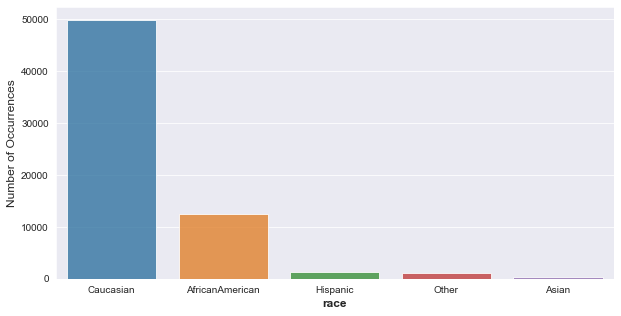

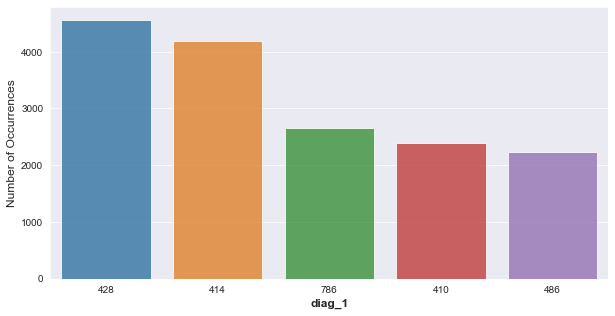

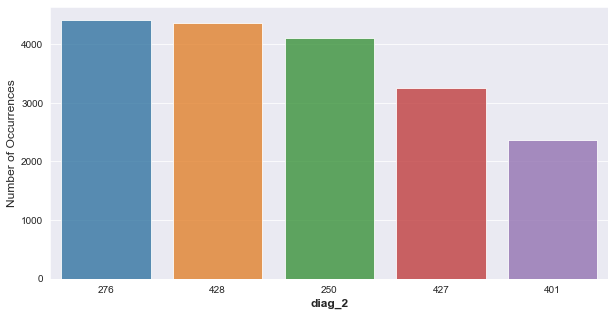

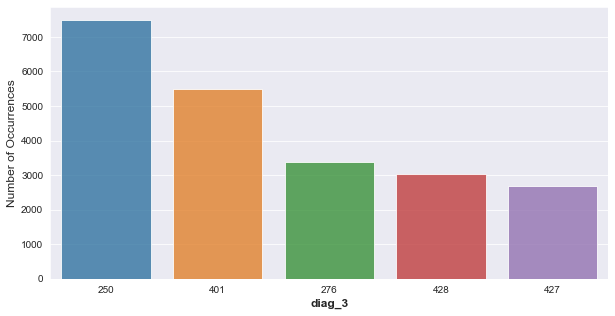

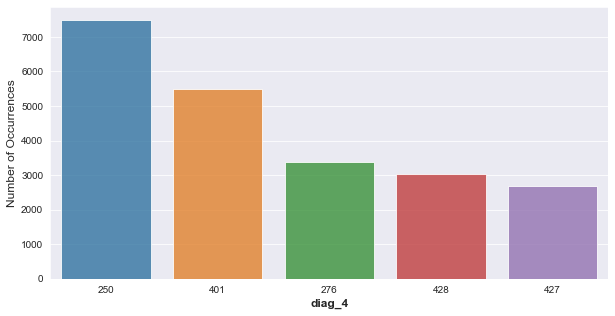

In [63]:
 for i in ("race","diag_1","diag_2","diag_3","diag_4"):
        count  = train[i].value_counts().nlargest(5)
        plt.figure(figsize=(10,5))
        sns.barplot(count.index, count.values, alpha=0.8)
        plt.ylabel('Number of Occurrences', fontsize=12)
        plt.xlabel(i, fontsize=12,fontweight='bold')
        plt.show()

In [64]:
train['race'] = train['race'].fillna(train['race'].mode()[0])
train['diag_1'] = train['diag_1'].fillna(train['diag_1'].mode()[0])
train['diag_2'] = train['diag_2'].fillna(train['diag_2'].mode()[0])
train['diag_3'] = train['diag_3'].fillna(train['diag_3'].mode()[0])
train['diag_4'] = train['diag_4'].fillna(train['diag_4'].mode()[0])

test['race'] = test['race'].fillna(test['race'].mode()[0])
test['diag_1'] = test['diag_1'].fillna(test['diag_1'].mode()[0])
test['diag_2'] = test['diag_2'].fillna(test['diag_2'].mode()[0])
test['diag_3'] = test['diag_3'].fillna(test['diag_3'].mode()[0])
test['diag_4'] = test['diag_4'].fillna(test['diag_4'].mode()[0])

In [65]:
object_col_train = train.select_dtypes(include=["object_"])
object_col_train.columns

object_col_test = test.select_dtypes(include=["object_"])
object_col_test.columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed'],
      dtype='object')

In [66]:
num_col_train = train.select_dtypes(include=["int64", "float64"])
num_col_train.columns

num_col_test = test.select_dtypes(include=["int64", "float64"])
num_col_test.columns

Index(['index', 'encounter_id', 'patient_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5',
       'number_diagnoses'],
      dtype='object')

In [67]:
for col in [object_col_train.columns]:
    train[col] = train[col].astype('category')
cat_col_train = train.select_dtypes(include=["category"])

for col in [object_col_test.columns]:
    test[col] = test[col].astype('category')
cat_col_test = test.select_dtypes(include=["category"])

In [68]:
realnum_col = ['time_in_hospital',
       'num_lab_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5',
       'number_diagnoses']

In [69]:
"""fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20,30))
index = 0
axs = axs.flatten()
for i, ax in enumerate(axs.flat):
    sns.distplot(train[realnum_col].iloc[:,i], ax=axs[index])
    index += 1
plt.tight_layout()"""

'fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20,30))\nindex = 0\naxs = axs.flatten()\nfor i, ax in enumerate(axs.flat):\n    sns.distplot(train[realnum_col].iloc[:,i], ax=axs[index])\n    index += 1\nplt.tight_layout()'

In [70]:
train = train[~(train['number_outpatient'] >= 6.0)]
train = train[~(train['num_lab_procedures'] >= 100.0)]
train = train[~(train['num_medications'] >= 50.0)]
train = train[~(train['number_emergency'] >= 5.0)]
train = train[~(train['number_inpatient'] >= 6.0)]

test = test[~(test['number_outpatient'] >= 6.0)]
test = test[~(test['num_lab_procedures'] >= 100.0)]
test = test[~(test['num_medications'] >= 50.0)]
test = test[~(test['number_emergency'] >= 5.0)]
test = test[~(test['number_inpatient'] >= 6.0)]

In [71]:
"""fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20,30))
index = 0
axs = axs.flatten()
for i, ax in enumerate(axs.flat):
    sns.distplot(train[realnum_col].iloc[:,i], ax=axs[index])
    index += 1
plt.tight_layout()"""

'fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(20,30))\nindex = 0\naxs = axs.flatten()\nfor i, ax in enumerate(axs.flat):\n    sns.distplot(train[realnum_col].iloc[:,i], ax=axs[index])\n    index += 1\nplt.tight_layout()'

In [72]:
cat_col_train.columns

Index(['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed'],
      dtype='object')

In [73]:
cat_columns = ['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed']

In [74]:
num_col_train.columns

Index(['index', 'encounter_id', 'patient_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5',
       'number_diagnoses', 'readmitted'],
      dtype='object')

In [75]:
le=LabelEncoder()

for i in cat_columns:
    train[i]=le.fit_transform(train[i])
for i in cat_columns:
    test[i]=le.fit_transform(test[i])

In [76]:
train.head()

,index,encounter_id,patient_id,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,X19,X20,X21,X22,X23,X24,X25,change,diabetesMed,readmitted
0,69375,197029140,51521940,3,1,8,4,39,1,9,...,0,1,1,0,0,0,0,1,1,1
1,57272,163571946,92631357,2,1,6,3,34,1,12,...,0,1,1,0,0,0,0,1,0,0
2,82347,256497366,30023982,2,0,5,6,50,2,24,...,0,0,1,0,0,0,0,0,1,1
3,89608,289891212,93606021,0,0,7,5,63,0,14,...,0,0,1,0,0,0,0,0,1,1
4,24091,81873900,23464296,2,1,7,9,17,1,11,...,0,1,1,0,0,0,0,1,0,1


In [77]:
cat_column_3 =['race', 'gender', 'age', 'diag_1', 'diag_2', 'diag_3', 'diag_4', 'X1',
       'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12',
       'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22',
       'X23', 'X24', 'X25', 'change', 'diabetesMed','readmitted']

In [78]:
"""from sklearn.feature_selection import chi2
resultant = pd.DataFrame(data=[(0 for i in range(len(cat_column_3))) for i in range(len(cat_column_3))],
                         columns=list(cat_column_3))
resultant.set_index(pd.Index(list(cat_column_3)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(cat_column_3):
    for j in list(cat_column_3):
        if i != j:
            chi2_val, p_val = chi2(np.array(train[i]).reshape(-1, 1), np.array(train[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
#print(resultant)
fig = plt.figure(figsize=(40,40))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results')
plt.show()"""

"from sklearn.feature_selection import chi2\nresultant = pd.DataFrame(data=[(0 for i in range(len(cat_column_3))) for i in range(len(cat_column_3))],\n                         columns=list(cat_column_3))\nresultant.set_index(pd.Index(list(cat_column_3)), inplace = True)\n\n# Finding p_value for all columns and putting them in the resultant matrix\nfor i in list(cat_column_3):\n    for j in list(cat_column_3):\n        if i != j:\n            chi2_val, p_val = chi2(np.array(train[i]).reshape(-1, 1), np.array(train[j]).reshape(-1, 1))\n            resultant.loc[i,j] = p_val\n#print(resultant)\nfig = plt.figure(figsize=(40,40))\nsns.heatmap(resultant, annot=True, cmap='Blues')\nplt.title('Chi-Square Test Results')\nplt.show()"

In [79]:
train=train.drop(['X8',"X18",'X19','X25'],axis=1)
test=test.drop(['X8',"X18",'X19','X25'],axis=1)

In [80]:
scaler = MinMaxScaler()
scaling_features = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_5',
'number_diagnoses']
for i in scaling_features:
    train[i] = scaler.fit_transform(train[i].values.reshape(-1, 1))

In [81]:
X = train.drop("readmitted", 1)
Y = train["readmitted"]

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.258, random_state=0)

In [83]:
lr_mod = LogisticRegression()

lr_mod.fit(X_train, y_train)
y_pred = lr_mod.predict(X_test)

print(f1_score(y_test, y_pred, average='micro'))

0.5651521517315887


In [84]:
DT_mod = DecisionTreeClassifier(random_state=1)
DT_mod.fit(X_train, y_train)
DTy_pred = DT_mod.predict(X_test)
#y = clf.predict(X)


f1score = f1_score(y_test, DTy_pred, average='micro')
print(round(f1score,2))

0.73


In [85]:
test1 = pd.read_csv(r"test.csv")

In [86]:
DTy_pred = pd.DataFrame(DTy_pred)

In [87]:
DTy_pred.drop(DTy_pred.tail(14).index, inplace = True)

In [88]:
test['prediction'] = DTy_pred
submit= test[['encounter_id','prediction']]

In [89]:
"""submit.columns = ['encounter_id','prediction']
submit.to_csv('submission_v9.csv', index = False)
submit.head()"""

,encounter_id,prediction
0,46325466,0
1,245219616,0
2,155321232,0
3,179491944,1
4,7425954,0
